# **EM-алгоритмы кластеризации**

В основе данного подхода лежит предположение, что **любой объект принадлежит ко всем кластерам, но с разной вероятностью**.

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

* на шаге **E** мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
* на шаге **M** мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

![](https://lms.skillfactory.ru/assets/courseware/v1/ed5c25926a67660b3ad829436b4b55a2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_17.png)

На шаге E данного алгоритма мы будем *определять вероятность того, что объект принадлежит к кластеру*, а на шаге M будем *пересчитывать параметры функции Гаусса*, чтобы подобрать наиболее подходящие кластеры для наших данных.

На анимации ниже гауссовы функции подгоняются под размеры кластеров:

![](https://lms.skillfactory.ru/assets/courseware/v1/3b25e08ac7b6d5adb70f9242b2cf1396/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_18.gif)



***
## **ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?**

* **K-means-кластеризацию можно использовать для кластеризации документов по разным категориям**, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

![](https://lms.skillfactory.ru/assets/courseware/v1/87f49d3de56e2d6aabb85e84ffe8d8a7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_19.png)

* **GMM можно использовать для сегментации изображений**, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

![](https://lms.skillfactory.ru/assets/courseware/v1/6982bc045abe8c62e8dcf60e72e4d646/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_20.png)

***
## **КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?**

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [3]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
X = df[['Attack', 'Defense']]


# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* **n_components** — количество кластеров.
* **random_state** — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

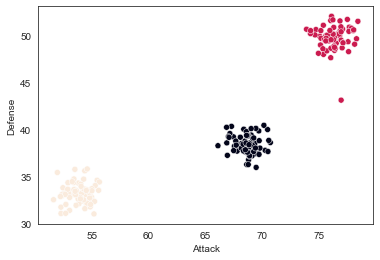

In [7]:
sns.set_style("white")
sns.scatterplot(df.Attack, df.Defense, c=gm_prediction)

Алгоритм отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными. Как видим, есть также одна точка-выброс, которую алгоритм не выделил в отдельный кластер.

Если выбрать количество кластеров, равное 4, получим следующий результат:

![](https://lms.skillfactory.ru/assets/courseware/v1/4c4f05ac7798f7e2b089b3e544f3ce6a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_22.png)

Как мы видим, в данном случае алгоритм тоже не выделил выброс в отдельный класс, но с кластеризацией также справился отлично.

***
## **ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ**

**ПРЕИМУЩЕСТВА:**

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

![](https://lms.skillfactory.ru/assets/courseware/v1/32f24c20454faf47ee135cc0d6110e04/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_23.png)

* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

![](https://lms.skillfactory.ru/assets/courseware/v1/afd530fb94ba7c77894c10464c118596/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_24.png)

**НЕДОСТАТКИ:**

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

***

### **ЗАДАЧА**

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

Для определения оптимального количества кластеров попробуйте визуализировать данные до кластеризации, а затем визуализируйте результаты после кластеризации.

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

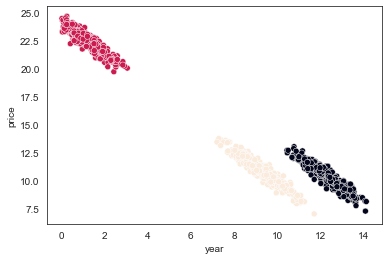

In [20]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

# загружаем данные
df = pd.read_csv('data/housing.csv')
X = df[['year', 'price']]


# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

sns.set_style("white")
sns.scatterplot(df.year, df.price, c=gm_prediction)

Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


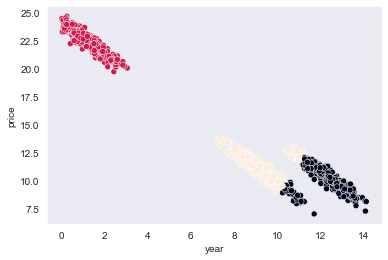

In [21]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

# загружаем данные
df = pd.read_csv('data/housing.csv')
X = df[['year', 'price']]


# импортируем библиотеки numpy и sklearn
import numpy as np
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=3, random_state=42)
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)

km_prediction = k_means.predict(X)
sns.set_style("dark")
sns.scatterplot(df.year, df.price, c=km_prediction);
